### Libraires

In [61]:
import yfinance as yf
import pandas as pd

In [62]:
sg = 'ZAL.DE'

data = yf.Ticker(sg)

df_data_zalando = data.history(period='max')


#### Zalando

In [63]:
df_data_zalando.shape

(2445, 7)

In [64]:
df_data_zalando.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-10-01 00:00:00+02:00,24.1,24.485001,21.5,21.5,15682223,0.0,0.0


#### Data Cleaning

In [65]:
df_data_zalando = df_data_zalando[['Close']].copy() #EUR

In [66]:
print(df_data_zalando["Close"].isna().sum())

0


In [67]:
print(df_data_zalando.index[0])

2014-10-01 00:00:00+02:00


In [68]:
df_data_zalando.index = df_data_zalando.index.date
print(df_data_zalando.index[0])

2014-10-01


In [44]:
# Convertir l'index en type datetime
df_data_zalando.index = pd.to_datetime(df_data_zalando.index)

# Vérifier que l'index est bien de type datetime
print(df_data_zalando.index.dtype)

# Renommer l'index en "date"
df_data_zalando.index.name = "Date"

# Vérifier que l'index a bien été renommé en "date"
print(df_data_zalando.index.name)

datetime64[ns]
Date


In [45]:
df_data_zalando.head(1)

,Close
Date,
2014-10-01,21.5


In [53]:
df_data_zalando_all = df_data_zalando.copy()

In [13]:
df_data_zalando = df_data_zalando.loc['2022-10-01':]

### Analyse univariée

<Axes: xlabel='Date'>

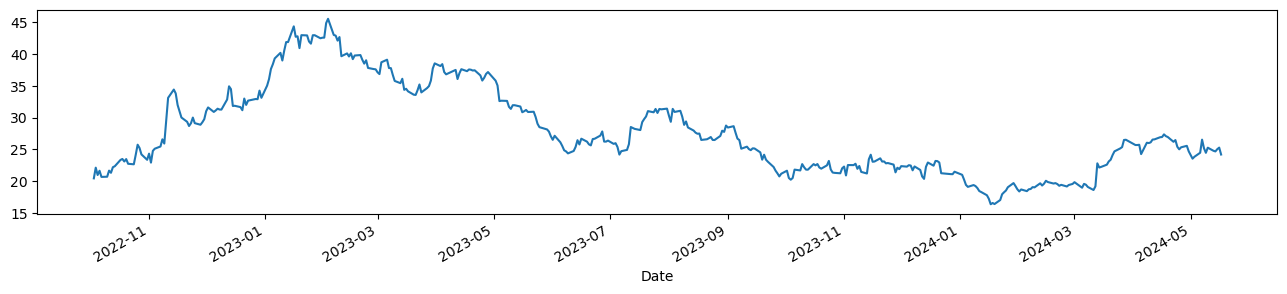

In [14]:
df_data_zalando["Close"].plot(figsize=(16,3))

#### Dispersion ou coefficient de variation

In [15]:
dispersion_moyenne_zalando = df_data_zalando["Close"].std() / df_data_zalando["Close"].mean() * 100
dispersion_moyenne_zalando

24.66867982863418

#### Volatilité

La volatilité des prix de clôture des actions de Zalando indique la variabilité des prix de clôture par rapport à leur valeur centrale (la moyenne).

#### Donnees aberantes

<Axes: >

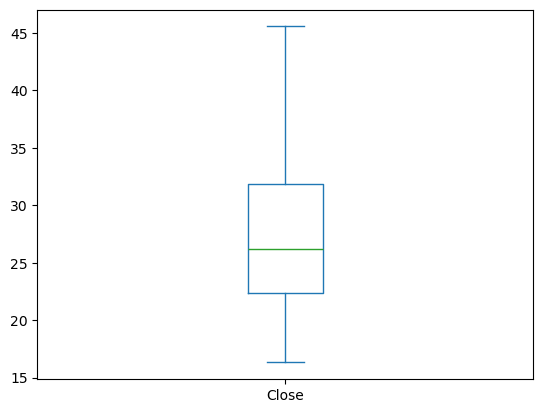

In [16]:
df_data_zalando["Close"].plot(kind="box")

In [17]:
Q1 = df_data_zalando['Close'].quantile(0.25)
Q3 = df_data_zalando['Close'].quantile(0.75)
IQR = Q3 - Q1

# Définir les valeurs aberrantes
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Compter les valeurs aberrantes
outliers = len(df_data_zalando[(df_data_zalando['Close'] < lower_limit) | (df_data_zalando['Close'] > upper_limit)])
total = len(df_data_zalando)

# Calculer le pourcentage de valeurs aberrantes
outlier_percentage = (outliers / total) * 100

print('Nombre de valeurs aberrantes :', outliers)
print('Pourcentage de valeurs aberrantes :', outlier_percentage)


Nombre de valeurs aberrantes : 0
Pourcentage de valeurs aberrantes : 0.0


In [18]:
Q1=df_data_zalando["Close"].quantile(0.25)
Q3=df_data_zalando["Close"].quantile(0.75)
IQR=Q3-Q1  #ecart interquartile
dispersion_mediane=IQR/df_data_zalando["Close"].median()*100
dispersion_mediane

36.511273509055755

#### Fluctuation 
La dispersion médiane des données de clôture de Zalando est d'environ 36.5%  Cette mesure de dispersion indique la variabilité des données par rapport à leur valeur centrale (la médiane).

<Axes: ylabel='Density'>

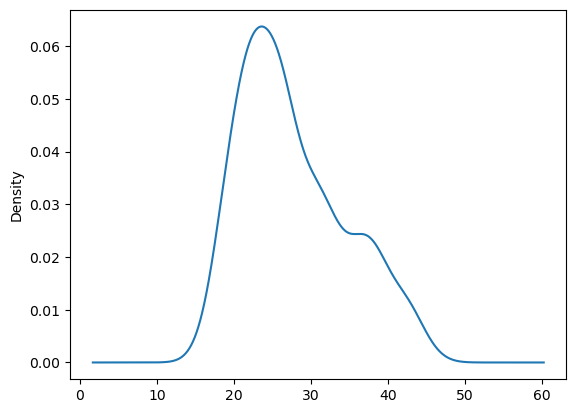

In [19]:
df_data_zalando["Close"].plot(kind="density")

In [20]:
df_data_zalando["Close"].skew()

0.6375254749317059

#### Tendance des valeurs 

Le coefficient d'asymétrie (skewness) de 0.6 indique que la distribution est asymétrique à droite. En termes de tendance des valeurs, une distribution asymétrique à droite peut indiquer que les valeurs élevées ont une influence plus importante sur la moyenne et l'écart-type que les valeurs faibles.

In [21]:
df_data_zalando["Close"].kurtosis()

-0.5210910502664556

#### Fréquence des valurs extrêmes

Le coefficient d'aplatissement (kurtosis) est égal à -0,5. Cela signifie que la distribution de ces données est légèrement plus plate (ou "platykurtique") que la distribution normale. En termes d'interprétation, une distribution plus plate que la normale peut indiquer que les valeurs extrêmes sont moins fréquentes que dans une distribution normale. 

### Test de normalite

In [22]:
import scipy.stats
scipy.stats.shapiro(df_data_zalando["Close"])[1]

1.4701097977853905e-11

#### Hasard ou facteurs exogènes

Dans le contexte de l'analyse de **données financières**, le hasard et les facteurs exogènes peuvent avoir une influence importante sur les variations de prix. Par exemple, un événement météorologique imprévu peut avoir une influence sur les prix des matières premières agricoles.

Le résultat du test de Shapiro-Wilk de 1.4916751861493438e-11 indique que la série de données "Close" de df_data_zalando n'est **pas normale**. Cela signifie que les variations de prix ne sont pas distribuées de manière symétrique autour d'une moyenne constante, et qu'il est possible que les variations soient influencées par des facteurs exogènes.

### Test de stationnarité

In [23]:
from statsmodels.tsa.stattools import adfuller as DukeyFuller_test
DukeyFuller_test(df_data_zalando["Close"])[1] 

0.5453734027085125

#### Stastionnaire ou temporelle

Nous pouvons conclure que la série est non stationnaire et qu'elle présente une tendance temporelle. Il est donc important de prendre en compte cette **tendance** temporelle dans toute analyse ultérieure de la série.

### Decomposition de la serie

In [24]:
from scipy.stats import boxcox

# Assurez-vous que 'Zalando_Close' est une série pandas
transformed_data, lambda_value = boxcox(df_data_zalando['Close'])

# Afficher la valeur optimale de lambda
print("Valeur optimale de lambda:", lambda_value)

Valeur optimale de lambda: -0.5385829831383377


#### Le test de Box-Cox

Le test de Box-Cox est une méthode de transformation de données qui permet de trouver la transformation optimale pour stabiliser la variance et normaliser les données. 

In [25]:
from scipy.stats import boxcox

# Appliquer le test de Box-Cox
transformed_data, lambda_value = boxcox(df_data_zalando['Close'])

# Afficher la valeur optimale de lambda
print("Valeur optimale de lambda:", lambda_value)


Valeur optimale de lambda: -0.5385829831383377


Interprétation du test de Box-Cox

- Si lambda est supérieur à zéro, une transformation puissance est recommandée, ce qui correspond à un **modèle multiplicatif**.
- Si lambda est égal à zéro, une transformation logarithmique est recommandée, ce qui correspond à un **modèle additif**.
- Si lambda est inférieur à zéro, une transformation inverse est recommandée, ce qui correspond à un **modèle alternatif**.

#### Decomposition of Alternative Time Series

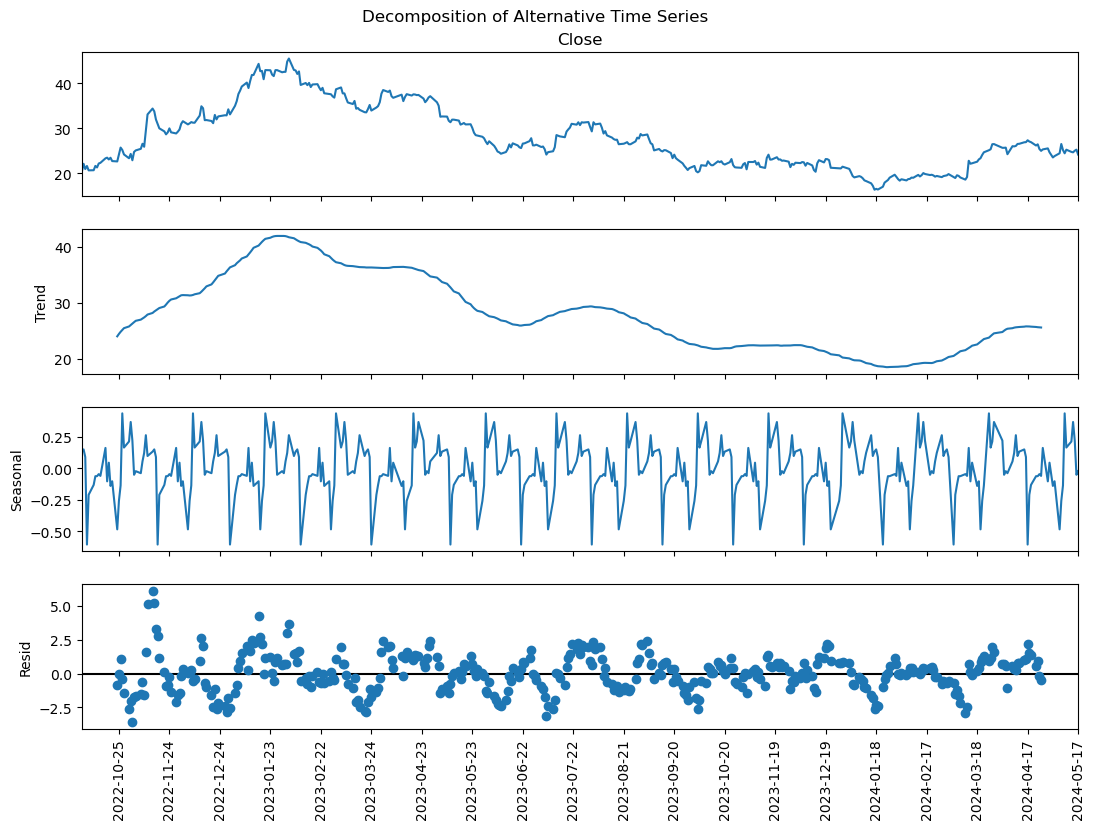

In [26]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

y=df_data_zalando['Close']
# Seasonal residus tendance decomposition
decomposition = seasonal_decompose(y, model='alternatif', period=30)
fig = decomposition.plot()

fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of Alternative Time Series')

for ax in fig.axes:
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.show()

#### Autocorrelation et autocorrelation partielle

In [54]:
df_data_zalando_copy = df_data_zalando_all.copy()
y = df_data_zalando_copy['Close'].resample('M').mean()

<Axes: xlabel='Date'>

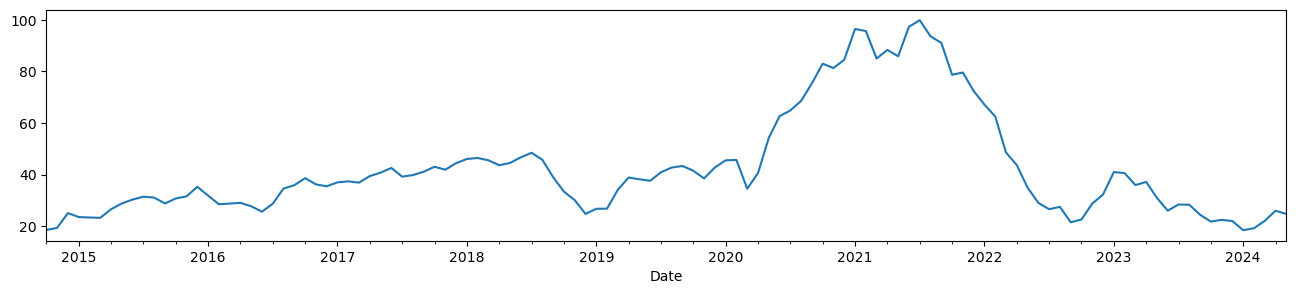

In [55]:
y.plot(figsize=(16,3))

In [56]:
y1=y.shift(1)
y1.head(5) 

Date
2014-10-31          NaN
2014-11-30    18.564091
2014-12-31    19.356000
2015-01-31    25.095000
2015-02-28    23.559762
Freq: M, Name: Close, dtype: float64

In [57]:
y.corr(y1)

0.9750688870468147

In [58]:
actuelle = y

y1=y.shift(1)   
y2=y.shift(2)   
y3=y.shift(3)   
y4=y.shift(4)   

print(actuelle.corr(y1),actuelle.corr(y2))
print(actuelle.corr(y3) ,actuelle.corr(y4))

0.9750688870468147 0.9341910318475323
0.8878003934120792 0.8343646955226534


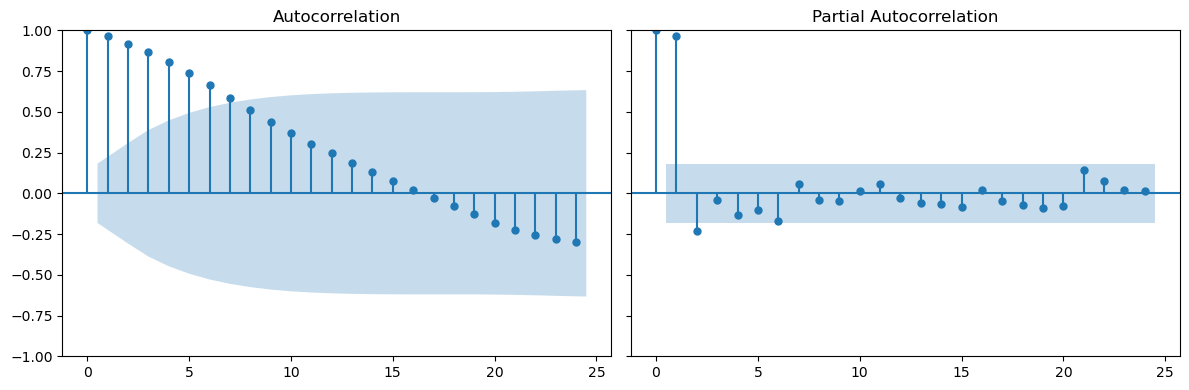

In [59]:
import statsmodels.tsa.api as smt

fig, axes = plt.subplots(1, 2, sharey=True, sharex=True)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(y, lags=24, ax=axes[0])
smt.graphics.plot_pacf(y, lags=24, ax=axes[1])
plt.tight_layout()

### 